In [209]:
import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np 

from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_confusion_matrix

from torchvision import transforms, utils

import cv2

import tensorflow as tf 
import keras
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [210]:
data = pd.read_csv('D:\\ML\\challenges-in-representation-learning-facial-expression-recognition-challenge\\icml_face_data.csv')

In [211]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [212]:
emotions = {0: 'Angry', 
            1: 'Disgust', 
            2: 'Fear', 
            3: 'Happy', 
            4: 'Sad', 
            5: 'Surprise', 
            6: 'Neutral'}

In [213]:
def prepare_data(data):
    
    images = np.zeros(shape=(len(data), 48, 48, 1))
    labels = np.array(list(map(int, data['emotion'])))
    
    for i, row  in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48, 1))
        images[i] = image 
        
    return images, labels

def plot_image_and_emotion(X, y, y_pred, num):
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    bar_label = emotions.values()
    
    axs[0].imshow(X[num], 'gray')
    axs[0].set_title(emotions[y[num]])
    
    axs[1].bar(bar_label, y_pred[num], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def res(X):
    
    for i in range(len(X)):
        image_string = (X)[i]
        image_data = np.asarray(image_string, dtype=np.float32).reshape(48, 48)
        a.append(image_data) 
        
    return a

In [214]:
X_train, y_train = prepare_data(data[data[' Usage']=='Training'])
X_val, y_val     = prepare_data(data[data[' Usage']=='PrivateTest'])
X_test, y_test   = prepare_data(data[data[' Usage']=='PublicTest'])

In [216]:
y_train1 = y_train
y_val1   = y_val
y_test1  = y_test
y_train  = to_categorical(y_train)
y_val    = to_categorical(y_val)
y_test   = to_categorical(y_test)

In [217]:
X_train = X_train.astype('float32') / 255
X_val   = X_val.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

In [218]:
print('Размерность X_train:', X_train.shape)
print(X_train.shape[0], 'Размер train')
print(X_test.shape[0], 'Размер test')
print(X_val.shape[0], 'Размер val')

Размерность X_train: (48, 48, 1)
28709 Размер train
3589 Размер test
3589 Размер val


In [219]:
model = models.Sequential()
model.add(Conv2D(32, (1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, padding="same"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (7, 7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, padding="same"))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [220]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [221]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        64        
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)      

In [222]:
kergen = ImageDataGenerator(rotation_range=10, 
                            vertical_flip=True,
                            horizontal_flip=True) 

In [223]:
torgen = transforms.Compose([transforms.ToTensor(),
                             transforms.RandomRotation(degrees=10),
                             transforms.RandomVerticalFlip(p=0.5),
                             transforms.RandomHorizontalFlip(p=0.5),
                             transforms.ToPILImage(mode=None)
                             ])

In [225]:
X_train1 = []
X_test1 = []
X_val1 = []

for i in range(X_train.shape[0]):
    x = (np.array(torgen(X_train[i])).astype('float32') / 255).reshape(48, 48, 1)
    X_train1.append(x)
    
for i in range(X_test.shape[0]):
    x = (np.array(torgen(X_test[i])).astype('float32') / 255).reshape(48, 48, 1)
    X_test1.append(x)
    
for i in range(X_val.shape[0]):
    x = (np.array(torgen(X_val[i])).astype('float32') / 255).reshape(48, 48, 1)
    X_val1.append(x)
    
X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
X_val1 = np.array(X_val1)

print(X_train1.shape)
print(X_test1.shape)
print(X_val1.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [ ]:
plt.figure(figsize=[24,24])
plt.subplot(4,4,2)
plt.imshow(X_train[1],cmap="gray")
plt.title(emotions[y_train1[1]])
plt.axis("off")
plt.show()

plt.figure(figsize=[24,24])
plt.subplot(4,4,2)
plt.imshow(X_train1[1],cmap="gray")
plt.title(emotions[y_train1[1]])
plt.axis("off")
plt.show()

**Keras generator**

In [226]:
history = model.fit(kergen.flow(X_train, y_train, 
                                batch_size=32),
                    validation_data=(X_test, y_test),
                    steps_per_epoch=X_train.shape[0] // 32, 
                    epochs=50)

Epoch 1/50
897/897 [==============================] - 23s 17ms/step - loss: 1.9839 - accuracy: 0.2316 - val_loss: 1.7408 - val_accuracy: 0.2920
Epoch 2/50
897/897 [==============================] - 15s 16ms/step - loss: 1.7208 - accuracy: 0.3128 - val_loss: 1.5638 - val_accuracy: 0.3856
Epoch 3/50
897/897 [==============================] - 15s 16ms/step - loss: 1.5632 - accuracy: 0.3878 - val_loss: 1.4911 - val_accuracy: 0.4224
Epoch 4/50
897/897 [==============================] - 16s 17ms/step - loss: 1.4716 - accuracy: 0.4279 - val_loss: 1.3872 - val_accuracy: 0.4622
Epoch 5/50
897/897 [==============================] - 15s 17ms/step - loss: 1.4083 - accuracy: 0.4584 - val_loss: 1.3230 - val_accuracy: 0.4887
Epoch 6/50
897/897 [==============================] - 15s 17ms/step - loss: 1.3681 - accuracy: 0.4715 - val_loss: 1.3027 - val_accuracy: 0.4976
Epoch 7/50
897/897 [==============================] - 15s 17ms/step - loss: 1.3288 - accuracy: 0.4871 - val_loss: 1.2881 - val_accuracy:

In [227]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Потери на тесте train:', train_score[0])
print('Точность на тесте train:', train_score[1])
print('\n')
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Потери на тесте train:', test_score[0])
print('Точность на тесте train:', test_score[1])
print('\n')
val_score = model.evaluate(X_val, y_val, verbose=0)
print('Потери на тесте val:', val_score[0])
print('Точность на тесте val:', val_score[1])

Потери на тесте train: 0.5464577078819275
Точность на тесте train: 0.8137866258621216


Потери на тесте train: 1.116459608078003
Точность на тесте train: 0.6113123297691345


Потери на тесте val: 1.0625766515731812
Точность на тесте val: 0.622178852558136


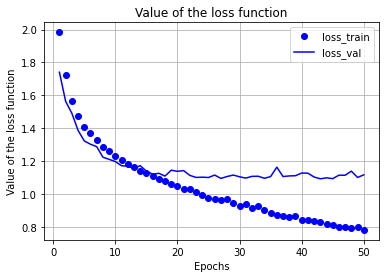

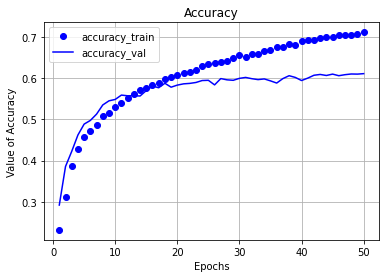

In [228]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

In [229]:
pred_test_labels = model.predict(X_test)

113/113 [==============================] - 1s 3ms/step


C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


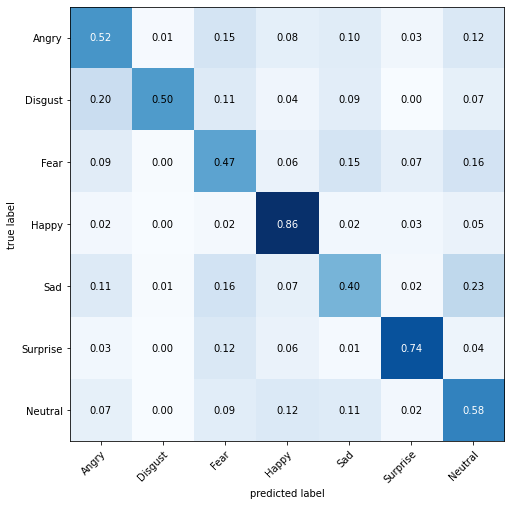

In [230]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

**PyTorch generator**

In [232]:
model1 = model

In [233]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [235]:
history1 = model1.fit(X_train2, y_train, 
                    batch_size=32,
                    validation_data=(X_test2, y_test),
                    steps_per_epoch=X_train.shape[0] // 32, 
                    epochs=50)

Epoch 1/50
897/897 [==============================] - 15s 16ms/step - loss: 0.6305 - accuracy: 0.7721 - val_loss: 1.2296 - val_accuracy: 0.5882
Epoch 2/50
897/897 [==============================] - 15s 16ms/step - loss: 0.5570 - accuracy: 0.8001 - val_loss: 1.2713 - val_accuracy: 0.5834
Epoch 3/50
897/897 [==============================] - 15s 16ms/step - loss: 0.4842 - accuracy: 0.8233 - val_loss: 1.3082 - val_accuracy: 0.5821
Epoch 4/50
897/897 [==============================] - 14s 16ms/step - loss: 0.4164 - accuracy: 0.8497 - val_loss: 1.4404 - val_accuracy: 0.5681
Epoch 5/50
897/897 [==============================] - 15s 17ms/step - loss: 0.3563 - accuracy: 0.8711 - val_loss: 1.5100 - val_accuracy: 0.5790
Epoch 6/50
897/897 [==============================] - 16s 18ms/step - loss: 0.3261 - accuracy: 0.8830 - val_loss: 1.5837 - val_accuracy: 0.5737
Epoch 7/50
897/897 [==============================] - 15s 16ms/step - loss: 0.3025 - accuracy: 0.8933 - val_loss: 1.5750 - val_accuracy:

In [236]:
train_score = model1.evaluate(X_train1, y_train, verbose=0)
print('Потери на тесте train:', train_score[0])
print('Точность на тесте train:', train_score[1])
print('\n')
test_score = model1.evaluate(X_test1, y_test, verbose=0)
print('Потери на тесте train:', test_score[0])
print('Точность на тесте train:', test_score[1])
print('\n')
val_score = model1.evaluate(X_val1, y_val, verbose=0)
print('Потери на тесте val:', val_score[0])
print('Точность на тесте val:', val_score[1])

Потери на тесте train: 1.089257001876831
Точность на тесте train: 0.7462816834449768


Потери на тесте train: 2.305816650390625
Точность на тесте train: 0.5731401443481445


Потери на тесте val: 2.243788957595825
Точность на тесте val: 0.57704097032547


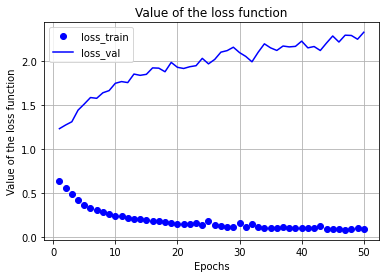

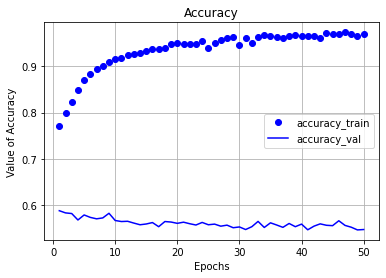

In [237]:
loss = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = history1.history['accuracy']
acc_val = history1.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

In [238]:
pred_test_labels = model1.predict(X_test1)

113/113 [==============================] - 1s 4ms/step


C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


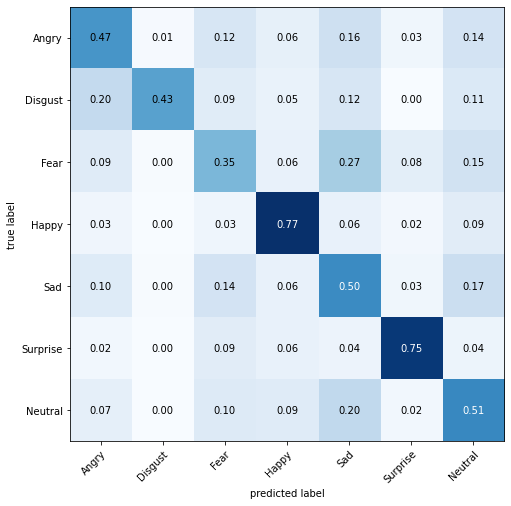

In [239]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()